In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:36<00:00, 32.7MB/s]
100% 1.06G/1.06G [00:36<00:00, 30.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D, Conv2D, Flatten, Dropout, BatchNormalization

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)




In [19]:
## creating CNN Model
model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [20]:
## compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
## fit hte model
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 60s 89ms/step - loss: 2.6415 - accuracy: 0.5846 - val_loss: 0.6271 - val_accuracy: 0.6436
Epoch 2/10
625/625 [==============================] - 60s 95ms/step - loss: 0.6284 - accuracy: 0.6508 - val_loss: 0.5882 - val_accuracy: 0.6872
Epoch 3/10
625/625 [==============================] - 56s 88ms/step - loss: 0.5823 - accuracy: 0.6975 - val_loss: 0.5908 - val_accuracy: 0.6876
Epoch 4/10
625/625 [==============================] - 58s 93ms/step - loss: 0.5485 - accuracy: 0.7204 - val_loss: 0.5690 - val_accuracy: 0.7088
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.5193 - accuracy: 0.7412 - val_loss: 0.5275 - val_accuracy: 0.7532
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4761 - accuracy: 0.7714 - val_loss: 0.5502 - val_accuracy: 0.7242
Epoch 7/10
625/625 [==============================] - 58s 93ms/step - loss: 0.4116 - accuracy: 0.8059 - val_loss: 0.5447 - val_accuracy:

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

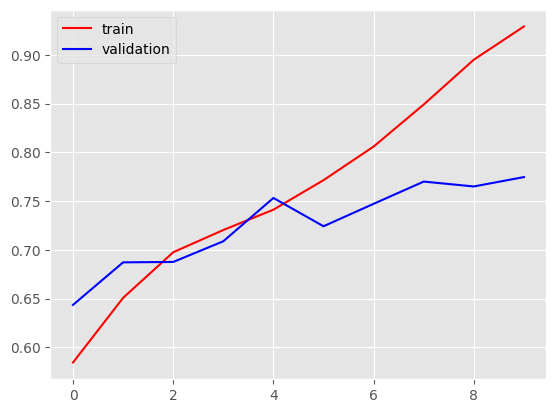

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

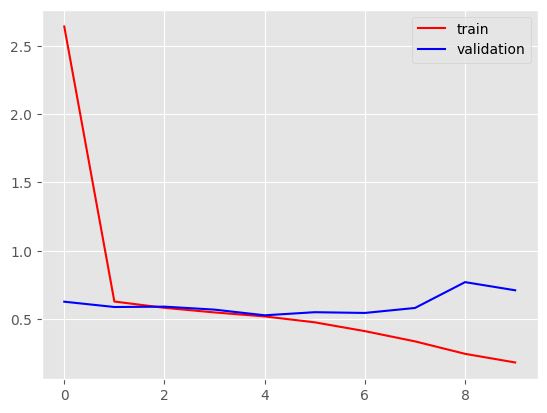

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [29]:
import cv2

In [37]:
test_img = cv2.imread('/content/dog.jpg')

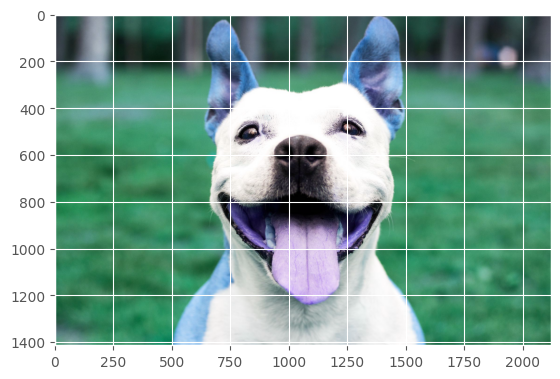

In [38]:
plt.imshow(test_img)

In [39]:
test_img.shape

(1414, 2121, 3)

In [40]:
test_img = cv2.resize(test_img,(256,256))

In [41]:
test_img =test_img.reshape((1,256,256,3))

In [42]:
model.predict(test_img)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)